# Pymaceuticals Inc.
---

### Analysis

1.) Capomulin and Ramicane drug regimens were the top used treatments, meaning more data is available for the two.


2.) The mice population between male and female mice was approximately 50/50.


3.) The mouse weight and average observed tumor volume for the entire Capomulin regimen was positively correlated.

In [127]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mice_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")  

# Display the data table for preview

mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [128]:
# Checking the number of mice.

mice_count = mice_df["Mouse ID"].nunique()
print(mice_count)

249


In [129]:
# Our data should be uniquely identified by Mouse ID and Timepoint

import numpy as np

duplicates = mice_df[mice_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice = np.array(duplicates["Mouse ID"].unique())
print(repr(duplicate_mice))

array(['g989'], dtype=object)


In [130]:
# Optional: Get all the data for the duplicate mouse ID.

duplicate_mice_df = mice_df[mice_df['Mouse ID'].isin(duplicate_mice)]
duplicate_mice_df.head(100)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [131]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

dropped_mouse = 'g989'
clean_mice = mice_df[mice_df['Mouse ID'] != dropped_mouse]
clean_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [132]:
# Checking the number of mice in the clean DataFrame.

clean_mice_count = clean_mice["Mouse ID"].nunique()
print(clean_mice_count)

248


## Summary Statistics

In [133]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = clean_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary DataFrame.

stats_df = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std,
    'Tumor Volume Std. Err.': sem
})

stats_df.head(100)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [134]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

simplified_df = clean_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    ['mean', 'median', 'var', 'std', 'sem']
)
simplified_df.head(100)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

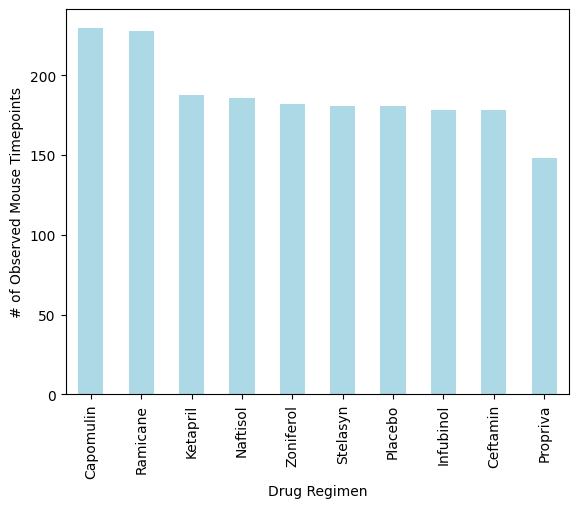

In [135]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen = clean_mice["Drug Regimen"].value_counts()
regimen.plot(kind="bar", figsize=(6.5, 5), color="lightblue")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

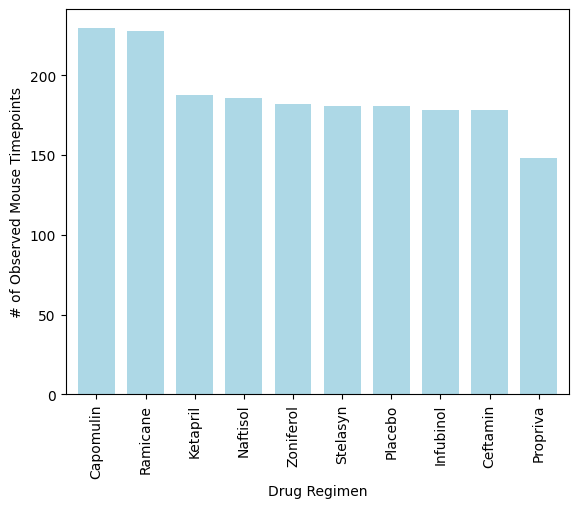

In [136]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen = clean_mice["Drug Regimen"].value_counts()
regimen.plot(kind="bar", figsize=(6.5, 5), color="lightblue", width=.75)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

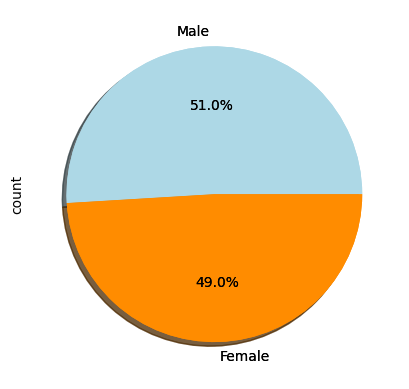

In [137]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

gender = clean_mice["Sex"].value_counts()
gender.plot(kind='pie', autopct="%1.1f%%", colors=["lightblue", "darkorange"], shadow=True)
plt.pie(gender.values, labels=gender.index, autopct="%1.1f%%", 
        colors=colors, shadow=True)
plt.show()

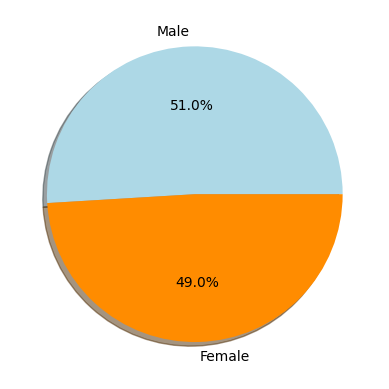

In [138]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

gender = clean_mice["Sex"].value_counts()
colors = ["lightblue", "darkorange"]

plt.pie(gender.values, labels=gender.index, autopct="%1.1f%%", 
        colors=colors, shadow=True)
plt.show()

## Quartiles, Outliers and Boxplots

In [139]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_df = clean_mice[clean_mice["Drug Regimen"].isin(treatments)]

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = filtered_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint_df = pd.merge(filtered_df, last_timepoint, on=["Mouse ID", "Timepoint"])

In [140]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
    treatment_data = clean_mice[clean_mice["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

print(f"The lower quartile of treatments is: {lowerq}")
print(f"The upper quartile of treatments is: {upperq}")
print(f"The interquartile range of treatments is: {iqr}")
print(f"The the median of treatments is: {quartiles[0.5]} ")

The lower quartile of treatments is: 47.2084271125
The upper quartile of treatments is: 56.801437570000004
The interquartile range of treatments is: 9.593010457500007
The the median of treatments is: 51.77615728 


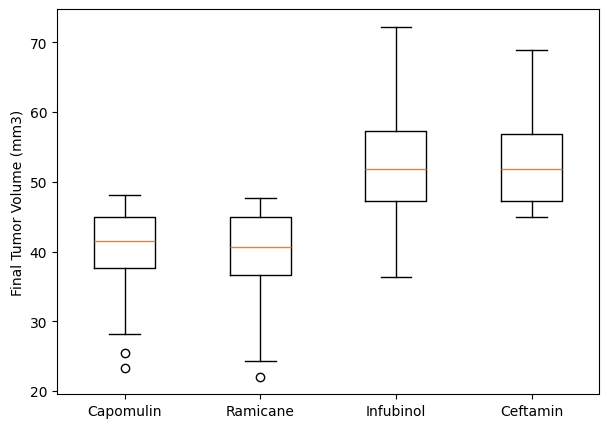

In [149]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

capomulin = clean_mice[clean_mice["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ramicane = clean_mice[clean_mice["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
infubinol = clean_mice[clean_mice["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ceftamin = clean_mice[clean_mice["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

treatment_data = [capomulin, ramicane, infubinol, ceftamin]

fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.boxplot(treatment_data)

ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

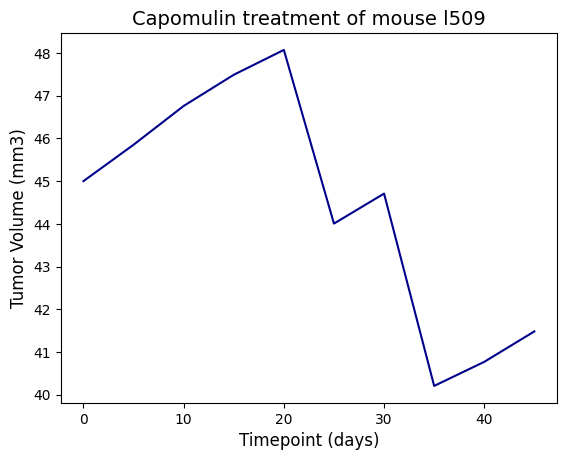

In [142]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = 'l509'
treatment_used = "Capomulin"

mouse_data = clean_mice[(clean_mice["Mouse ID"] == mouse_id) & (clean_mice["Drug Regimen"] == treatment_used)]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], color='darkblue', linestyle='-', label=mouse_id)
plt.title(f"Capomulin treatment of mouse {mouse_id}", fontsize=14)
plt.xlabel("Timepoint (days)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.show()

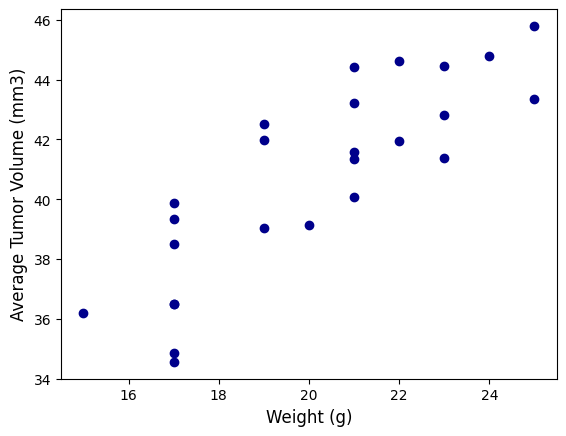

In [143]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_mice[clean_mice["Drug Regimen"] == "Capomulin"]
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

scatter_plot = pd.DataFrame({
    "Weight (g)": mouse_weight,
    "Average Tumor Volume (mm3)": avg_tumor_volume
})

plt.scatter(scatter_plot["Weight (g)"], scatter_data["Average Tumor Volume (mm3)"], color='darkblue')

plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)
plt.show()

## Correlation and Regression

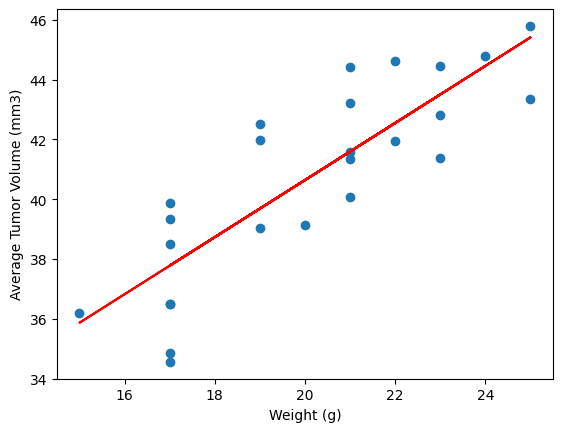

In [147]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = scatter_plot['Weight (g)']
y_values = scatter_plot['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()